# Разведочный анализ данных (exploratory data analysis, EDA)

Задачи, которые ставятся перед аналитиками, достаточно разнообразны. Однако всё начинается с данных. 

В этом курсе мы не будем касаться бизнес-составляющей анализа данных, но при этом нужно понимать, что данные не берутся "из воздуха". Как и задачи, связанные с ними. В книге [Билла Фрэнкса](https://play.google.com/store/books/details/%D0%91_%D0%A4%D1%80%D1%8D%D0%BD%D0%BA%D1%81_%D0%A0%D0%B5%D0%B2%D0%BE%D0%BB%D1%8E%D1%86%D0%B8%D1%8F_%D0%B2_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B5_%D0%9A%D0%B0%D0%BA_%D0%B2_%D1%8D%D0%BF%D0%BE%D1%85%D1%83_Big_Dat?id=yPvkDQAAQBAJ) об операционной аналитике автор акцентирует внимание на том, что непродуманные инвестиции в сбор и хранение данных по принципу "а вдруг потом пригодятся" зачастую себя не оправдывают. Только после того, как поставлена определённая цель, можно начинать процесс сбора (или, возможно, покупки) и анализа данных.

К сожалению, на практике данные в "сыром" виде обычно малопригодны для анализа. Процесс подготовки и очистки данных (препроцессинг, англ. data preparation, pre-processing, data cleaning) может быть **весьма трудоёмким** и по времени занимать больше, чем собственно построение и валидация моделей на основе данных. Выделим некоторые составляющие этого процесса:

- data specification (понимание данных)
- data editing (редактирование данных, исправление ошибок --- ручное, автоматическое или их комбинация)
- работа с пропущенными значениями
- нормализация
- feature extraction and selection (создание и отбор признаков)

В результате получаем данные в удобном для анализа формате, как правило, табличном. Таблица (или датафрейм) имеет структуру "объекты-признаки": строки соответствуют отдельным сущностям (объектам, примерам, экземплярам), а столбцы --- атрибутам этих сущностей (признакам).

## Экосистема Python. Библиотека NumPy

Python --- высокоуровневый язык программирования общего назначения. На сегодня это наиболее востребованный язык программирования в Data Science и Machine Learning. Однако "чистый" Python имеет ряд недостатков, главным образом, связанных со временем выполнения кода. Традиционные структуры данных, такие как списки и кортежи, а также циклы for и while работают "медленно", и в случае анализа больших данных это становится проблемой. 

Библиотека NumPy предназначена для работы с многомерными массивами (arrays) и разработана таким образом, чтобы время выполнения операций с большими данными было **существенно меньше** (иногда в сотни или даже тысячи раз), чем при использовании "чистого" Python. Библиотека содержит большое количество быстрых и высокоуровневых операций с одно-, дву- и многомерными массивами (тензорами), а также ряд функций векторной и матричной алгебры. На базе массивов NumPy работают все библиотеки более высокого уровня в экосистеме Python (Pandas, Matplotlib, Scikit-Learn, библиотеки глубокого обучения Tensorflow, PyTorch и многие другие), что делает изучение идеологии массивов NumPy и возможностей этой библиотеки безусловным "must have" для аналитика.

## Библиотека Pandas

Pandas --- библиотека Python, основное предназначение которой --- загрузка, препроцессинг и разведочный анализ данных. Разведочный анализ предшествует непосредственно построению предсказательных моделей машинного обучения и призван помочь исследователю лучше понять особенности датасета, взаимосвязи (корреляции) между признаками, а также сделать первые простые выводы на основе данных. Однако "просто" --- не значит "плохо". Эти (на первый взгляд) примитивные выводы дают ориентиры (baselines) для последующих более сложных моделей, а может оказаться и так, что именно найденные на этапе разведочного анализа закономерности помогут достичь желаемой цели без погружения в сложные модели машинного обучения.

## Визуализация. Библиотеки Matplotlib и Seaborn

Важная составляющая разведочного анализа --- визуализация данных. Качественные графики и диаграммы помогают увидеть больше, чем скучные и однообразные таблицы. Библиотека Pandas имеет встроенные средства визуализации на основе графики Matplotlib. Сама по себе библиотека Matplotlib предоставляет множество низкоуровневых графических инструментов, так что исследователь может контролировать буквально всё --- от цвета точек до шрифтов на осях координат. Библиотека Seaborn содержит больше высокоуровневых возможностей и призвана в какой-то степени "упростить жизнь" пользователям Matplotlib, автоматизируя многие рутинные вещи. Обычно встроенная графика Pandas, библиотеки Matplotlib и Seaborn используются совместно, что мы и продемонстрируем в дальнейшем.

In [46]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); # более красивый внешний вид графиков по умолчанию

## Загрузка данных

Данные, прошедшие предварительную подготовку и обработку, обычно имеют табличный формат и хранятся в виде CSV-файлов (а также TSV, XLS, XLSX etc.). В этом случае стоит использовать метод [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Также данные могут подтягиваться непосредственно из табличных баз данных, и для этих целей Pandas имеет метод [read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). В других случаях могут пригодиться [read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html) и [прочие методы](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

В ходе этого курса мы рассмотрим работу не только с традиционными табличными данными, но также с текстом и изображениями.

Метод [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) имеет множество настраиваемых параметров. Наиболее существенные из них: имя файла (или URL), тип разделителя ячеек (по умолчанию --- запятая), наличие строки заголовка (указывается её номер; по умолчанию имена признаков считываются из первой строки файла), наличие колонки с индексами (идентификаторами) строк (также указывается номер; по умолчанию --- отсутствует). С остальными параметрами рекомендуем ознакомиться в документации.

In [47]:
df = pd.read_csv('../input/cardio_train.csv', sep=';')

## Первый взгляд на данные

In [48]:
# Метод head(n) предназначен для просмотра первых n строк таблицы (по умолчанию n=5)
# Аналогично метод tail(n) возвращает последние n строк
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [49]:
# Если признаков (столбцов) слишком много, полезно будет транспонировать вывод
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0.0,1.0,2.0,3.0,4.0,8.0,9.0,12.0,13.0,14.0
age,18393.0,20228.0,18857.0,17623.0,17474.0,21914.0,22113.0,22584.0,17668.0,19834.0
gender,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
height,168.0,156.0,165.0,169.0,156.0,151.0,157.0,178.0,158.0,164.0
weight,62.0,85.0,64.0,82.0,56.0,67.0,93.0,95.0,71.0,68.0
ap_hi,110.0,140.0,130.0,150.0,100.0,120.0,130.0,130.0,110.0,110.0
ap_lo,80.0,90.0,70.0,100.0,60.0,80.0,80.0,90.0,70.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Метод info() позволяет вывести общую информацию о датасете
# Мы можем узнать тип каждого признака, а также есть ли в данных пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [51]:
# Метод describe() позволяет собрать некоторую статистику по каждому числовому признаку
# Для более удобного прочтения полученную таблицу можно транспонировать
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Обратим внимание, что некоторые из признаков бинарные (smoke, alco, active, cardio), поэтому стандартные описательные статистики --- среднее, стандартное отклонение, медиана, квартили --- для них не имеют смысла. В этом случае полезнее будет обычный подсчёт значений. Например, так мы можем узнать, сколько пациентов с выявленными сердечно-сосудистыми заболеваниями (ССЗ) имеется в выборке.

In [52]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Мы видим, что здоровых и больных у нас примерно равное количество, т. е. классы 0 и 1 сбалансированы (о проблеме несбалансированных классов мы будем говорить позже).

In [53]:
# Параметр normalize позволяет узнать процентное соотношение
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

## Исследуем отдельные признаки ("фичи")

Посмотрим на распределение значений роста пациентов. Теория утверждает, что рост --- величина, обычно имеющая нормальное распределение.

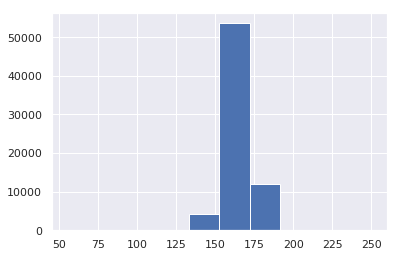

In [54]:
df['height'].hist();

График по умолчанию оказался малоинформативным. Попробуем улучшить ситуацию, добавив параметр bins.

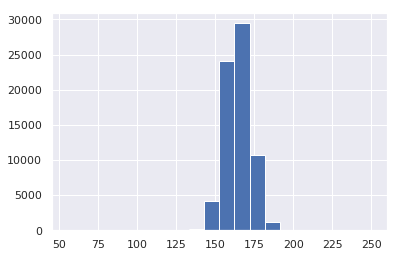

In [55]:
df['height'].hist(bins=20);

Как и ожидалось, имеем нечто похожее на гистограмму нормального распределения. Однако на картнике не видны выбросы (outliers) --- точки, "выбивающиеся" из общей картины. Поэтому иногда полезнее применить boxplot ("ящик с усиками").

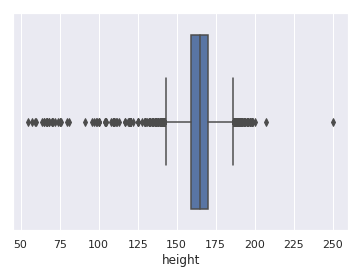

In [56]:
sns.boxplot(df['height']);

Ширина "ящика" равна интерквартильному размаху (разность между третьим $Q_3$ и первым $Q_1$ квартилями). Вертикальная линия внутри ящика показывает медиану (второй квартиль). "Усики" ограничивают точки, попадающие в интервал $[Q_1-1.5*IQR; Q_3+1.5*IQR]$, где $IQR$ --- интерквартильный размах. Наконец, отдельные точки на графике соответствуют выбросам --- нетипичным для данной выборки значениям. Как видим, их оказалось довольно много.

## Исследуем признаки совместно

Например, исследователя может интересовать вопрос: каков средний возраст здоровых и больных пациентов? Признак age имеет неудобную для интерпретации единицу измерения --- дни, поэтому преобразуем его в количество лет. 

In [57]:
# Обратите внимание - мы применяем здесь метод, а не функцию round. Это значительно ускоряет вычисления
# Операция "деления столбца на число" работает интуитивно понятно - 
# каждый элемент делится на это число. Магия NumPy в действии!
df['age'] = (df['age'] / 365).round()

### GROUP BY
Внимание: здесь мы знакомимся с одной очень полезной операцией --- группировкой. Метод groupby работает аналогично операции GROUP BY в языке SQL и позволяет группировать данные по одному или нескольким атрибутам, вычисляя затем агрегированные показатели в каждой группе.

In [58]:
# Синтаксис предельно прост, лаконичен и интуитивно понятен
df.groupby('cardio')['age'].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

Как показывают вычисления, средний возраст людей с ССЗ чуть выше, чем у здоровых. Эти вычисления можно также визуализировать с помощью встроенной графики Pandas.

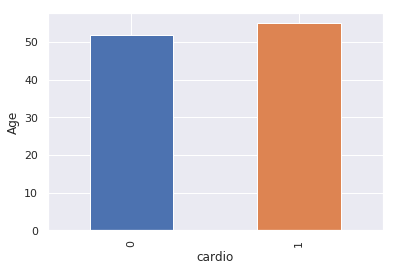

In [59]:
df.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

### countplot
Теперь попробуем посмотреть, как распределено количество здоровых и больных пациентов по возрастным группам. Здесь нам поможет график countplot библиотеки Seaborn.

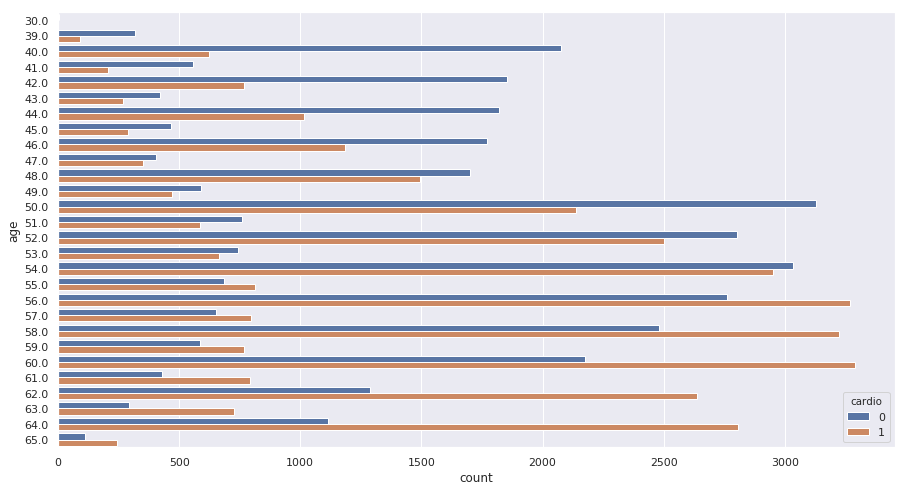

In [60]:
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='age', hue='cardio', data=df);

Важное наблюдение --- начиная с 55 лет количество больных пациентов превышает количество здоровых.

### Scatter plot
Полезным типом графика для исследования пар числовых признаков является диаграмма рассеяния (scatter plot). Рассмотрим возраст и рост пациентов.

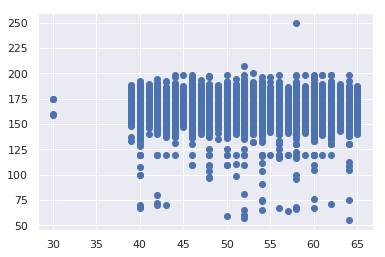

In [61]:
plt.scatter(df['age'], df['height']);

Здесь становится ясно, что наши выбросы в данных --- это просто ошибки ввода. Если, конечно, мы не проводили исследование среди лиллипутов :)

Для изучения совместного распределения двух числовых признаков полезным может оказаться jointplot библиотеки Seaborn:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


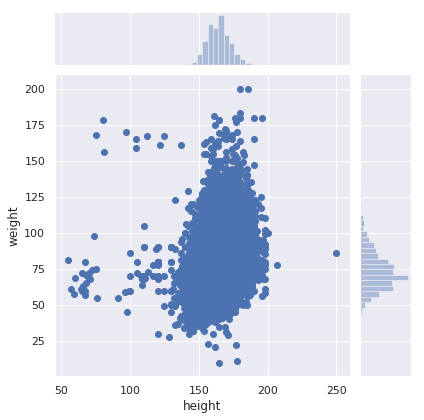

In [62]:
sns.jointplot(x='height', y='weight', data=df);

Ошибки и аномалии в данных чётко видны и на этом графике. Также можно заключить, что без учёта выбросов рост и вес имеют распределения, близкие к нормальному.

### Сводные таблицы

Для исследования трёх и более признаков полезным инструментов являются сводные таблицы (pivot tables). Этот инструмент хорошо знаком продвинутым пользователям электронных таблиц Excel, Google Spreadsheets. Рассмотрим, как с помощью сводной таблицы ответить на вопросы: 
- верно ли, что с возрастом люди становятся более склонны к употреблению алкоголя;
- верно ли, что среди курящих процент ССЗ больше.

In [63]:
# values - признаки, по которым вычисляются значения функции aggfunc
# index - признаки, по которым выполняется группировка
df.pivot_table(values=['age', 'cardio'], index=['smoke', 'alco'], aggfunc='mean')

age    cardio
smoke alco                     
0     0     53.449185  0.501462
      1     53.121990  0.523037
1     0     52.493627  0.487833
      1     51.838188  0.444444

Как видим, ответы на оба вопроса отрицательные. Склонность к алкоголю, похоже, не коррелирует с возрастом, а процент ССЗ оказался выше среди некурящих.

Чтобы понять, как связаны употребление алкоголя и курение, посмотрим на кросс-таблицу (таблицу сопряжённости):

In [64]:
pd.crosstab(df['smoke'], df['alco'])

alco,0,1
smoke,,
0,61921,1910
1,4315,1854


Пока можно только сказать, что непьющих и некурящих пациентов существенно больше, чем всех остальных. Для обоснованных выводов о взаимосвязи следует обратиться к численным расчётам.

## Выборка данных по условию. Способы индексирования в Pandas

Иногда нам нужно провести вычисления не на всей обучающей выборке, а на некоторой её части. Для этого нужно знать и понимать способы доступа к ячейкам в датафреймах.

Начнём с исследования одного признака "в себе". Для примера возьмём рост.

In [65]:
h = df['height'] # сохраним всю колонку "рост" в отдельную переменную для экспериментов
type(h) # посмотрим тип 

pandas.core.series.Series

Таким образом, видим, что таблица (датафрейм, DataFrame) представляет собой набор именованных столбцов (рядов, Series). Доступ к столбцам осуществляется по ключу --- названию столбца, как в словарях Python. Технически можно представлять себе датафрейм как словарь столбцов.

А как же насчёт строк?

In [66]:
first_patient = df[0]

KeyError: 0

Oops! Мы получили ошибку: KeyError означает, что нет столбца с именем "0". То есть обратиться к строке через обычный индекс мы не можем. Для этого нам будет нужен "неявный" индекс (implicit loc, iloc).

In [67]:
first_patient = df.iloc[0]
print(first_patient)

id               0.0
age             50.0
gender           2.0
height         168.0
weight          62.0
ap_hi          110.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           0.0
Name: 0, dtype: float64


И опять мы видим, что технически строка датафрейма представляет собой словарь. Ключами словаря являются имена столбцов, значениями --- значения признаков для данной строки.

Чтобы узнать, например, возраст первого пациента (не запоминая его в отдельную переменную), нужно применить явное индексирование (loc):

In [68]:
print(df.loc[0, 'age'])

50.0


Вернёмся теперь к переменной h. Напомню, в ней мы сохранили все значения из столбца "рост". Рост указан в сантиметрах. Переведём в метры.

In [69]:
h_meters = h / 100 # предельно просто!
h_meters[:10] # в отдельных столбцах уже можно применять "обычные" срезы, как в списках

0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
5    1.51
6    1.57
7    1.78
8    1.58
9    1.64
Name: height, dtype: float64

Выше на нескольких диаграммах мы видели, что среди значений роста присутствуют ошибки. Давайте посмотрим, сколько пациентов имеют рост ниже 125 см. Внимание, вопрос --- как решить эту задачу в классическом стиле?

In [70]:
%%timeit
lilliputs = 0
for value in h:
    if value < 125:
        lilliputs = lilliputs + 1

4.24 ms ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


А теперь решим ту же задачу в NumPy-стиле:

In [71]:
%%timeit
h[h < 125].shape[0]

539 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Итак, второй способ оказался быстрее приблизительно в 5 раз на наборе данных из 70000 значений (относительно небольшом). С ростом длины вектора циклы становятся в сотни и тысячи раз медленнее, чем векторизованные операции NumPy.

Итак, выборку из массива значений можно выполнять по условному индексу. Похожим образом это работает и для отбора строк в датафрейме.

In [72]:
# Вычислим средний возраст людей, склонных к курению
df[df['smoke'] == 1]['age'].mean()

52.29664451288701

In [73]:
# Условие может быть составным
df[(df['smoke'] == 1) & (df['cardio'] == 1)]['age'].mean()

53.76135199726869

## Фильтрация датафрейма. Удаление строк и столбцов

Для удаления строк и столбцов в датафрейме используется метод drop. Рассмотрим удаление по ключам и по условию.

In [74]:
# Удалим целевой признак cardio
dummy_df = df.drop('cardio', axis=1)
dummy_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [75]:
# Удалим первые 100 пациентов
dummy_df = df.drop(np.arange(100), axis=0)
dummy_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
100,135,40.0,2,171,61.0,110,70,1,1,0,0,1,0
101,136,51.0,1,167,80.0,190,90,2,1,0,1,0,0
102,137,47.0,1,168,77.0,100,70,1,1,0,0,1,0
103,138,50.0,2,183,95.0,125,80,1,3,1,0,1,0
104,139,60.0,1,170,72.0,120,80,1,1,0,0,0,1


In [76]:
# Удалим всех пацентов с ростом ниже 125 см, а также выше 200 см
dummy_df = df.drop(df[(df['height'] < 125) | (df['height'] > 200)].index)
dummy_df.shape[0] / df.shape[0]

0.9987285714285714

Как видим, процент выбросов небольшой --- оставшаяся выборка составляет 99.9 % исходной.

## Добавление новых признаков

In [77]:
df['height_cm'] = df['height'] / 100
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56


## Перекодировка значений признаков
Наш датасет содержит только числовые значения, однако часто среди признаков есть категориальные, и в этом случае на этапе предобработки нужно применить один из видов кодирования. Простейший тип кодирования --- замена одних значений другими (label encoding). В данном случае нам придётся (исключительно с целью продемонстрировать работу метода) применить обратную операцию. Например, перекодируем признак "уровень холестерина" по принципу:
- 1 --- "low"
- 2 --- "normal"
- 3 --- "high"

In [78]:
new_values = {1:'low', 2:'normal', 3:'high'} # обычный словарь Python
df['dummy_cholesterol'] = df['cholesterol'].map(new_values)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56,low


Перекодируем целевой признак cardio в логический (True/False).

In [79]:
df['cardio'] = df['cardio'].astype(bool)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low


**Домашняя работа**

In [80]:
df.groupby('gender')['height'].mean()
#получается, что "1" - женщины, "2" - мужчины

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [81]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low


In [95]:
#для удобства, перекадируем признак gender:
new_values = {1:'woman', 2:'man'}
df['new_gender'] = df['gender'].map(new_values)
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol,new_gender
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low,man
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high,woman
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high,woman
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low,man
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low,woman
5,8,60.0,1,151,67.0,120,80,2,2,0,0,0,False,1.51,normal,woman
6,9,61.0,1,157,93.0,130,80,3,1,0,0,1,False,1.57,high,woman
7,12,62.0,2,178,95.0,130,90,3,3,0,0,1,True,1.78,high,man
8,13,48.0,1,158,71.0,110,70,1,1,0,0,1,False,1.58,low,woman
9,14,54.0,1,164,68.0,110,60,1,1,0,0,0,False,1.64,low,woman


In [96]:
df['new_gender'].value_counts()

woman    45530
man      24470
Name: new_gender, dtype: int64

In [124]:
#2
pd.crosstab(df['alco'], df['new_gender'])
#да, мужчины более склонны к употреблению алкоголя

new_gender,man,woman
alco,,
0,21867,44369
1,2603,1161


In [98]:
df[df['new_gender'] == 'man']['alco'].value_counts(normalize=True)

0    0.893625
1    0.106375
Name: alco, dtype: float64

In [99]:
df[df['new_gender'] == 'woman']['alco'].value_counts(normalize=True)

0    0.9745
1    0.0255
Name: alco, dtype: float64

In [101]:
#3
df[df['smoke'] == 1]['new_gender'].value_counts(normalize=True)
#процент курящих мужчин выше, чем курящих женщин

man      0.868212
woman    0.131788
Name: new_gender, dtype: float64

In [105]:
#4
df.pivot_table(values=['age'], index=['smoke'], aggfunc='mean')

,age
smoke,
0,53.439395
1,52.296645


In [106]:
#5
BMI = df['weight']/(df['height_cm']*df['height_cm'])
BMI[:10]

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
5    29.384676
6    37.729725
7    29.983588
8    28.440955
9    25.282570
dtype: float64

In [121]:
#5.a
BMI.mean()

27.55651255127882

In [122]:
B = BMI.mean()
if B <= 18.5 or B >= 25:
    print('False')
#не верно

False


In [119]:
df['BMI'] = BMI
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol,new_gender,BMI
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low,man,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high,woman,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high,woman,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low,man,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low,woman,23.011177
5,8,60.0,1,151,67.0,120,80,2,2,0,0,0,False,1.51,normal,woman,29.384676
6,9,61.0,1,157,93.0,130,80,3,1,0,0,1,False,1.57,high,woman,37.729725
7,12,62.0,2,178,95.0,130,90,3,3,0,0,1,True,1.78,high,man,29.983588
8,13,48.0,1,158,71.0,110,70,1,1,0,0,1,False,1.58,low,woman,28.440955
9,14,54.0,1,164,68.0,110,60,1,1,0,0,0,False,1.64,low,woman,25.282570


In [120]:
#5.b
df.groupby('new_gender')['BMI'].mean()
#верно

new_gender
man      26.754442
woman    27.987583
Name: BMI, dtype: float64

In [123]:
#5.с
df.groupby('cardio')['BMI'].mean()
#не верно

cardio
False    26.548175
True     28.566061
Name: BMI, dtype: float64

In [125]:
#5.d
# 18.5 <= BMI <= 25
df.pivot_table(values=['BMI'], index=['cardio', 'alco', 'new_gender'], aggfunc='mean')
#верно

BMI
cardio alco new_gender           
False  0    man         25.872638
            woman       26.845407
       1    man         26.097220
            woman       28.671457
True   0    man         27.522450
            woman       29.052771
       1    man         28.226569
            woman       30.812347

In [126]:
#6
dummy_df = df.drop(df[(df['ap_lo'] > df['ap_hi'])].index)
dummy_df.shape[0] / df.shape[0]

0.9823714285714286

In [131]:
#7
df[(df['smoke']==1)&(df['new_gender']=='man')&(df['age']>=60)&(df['age']<=65)&(df['ap_hi']<=120)&(df['cholesterol']==1)]['cardio'].value_counts()

False    201
True      97
Name: cardio, dtype: int64

In [130]:
df[(df['smoke']==1)&(df['new_gender']=='man')&(df['age']>=60)&(df['age']<=65)&(df['ap_hi']>=160)&(df['ap_hi']<=180)&(df['cholesterol']==3)]['cardio'].value_counts()

True     24
False     3
Name: cardio, dtype: int64

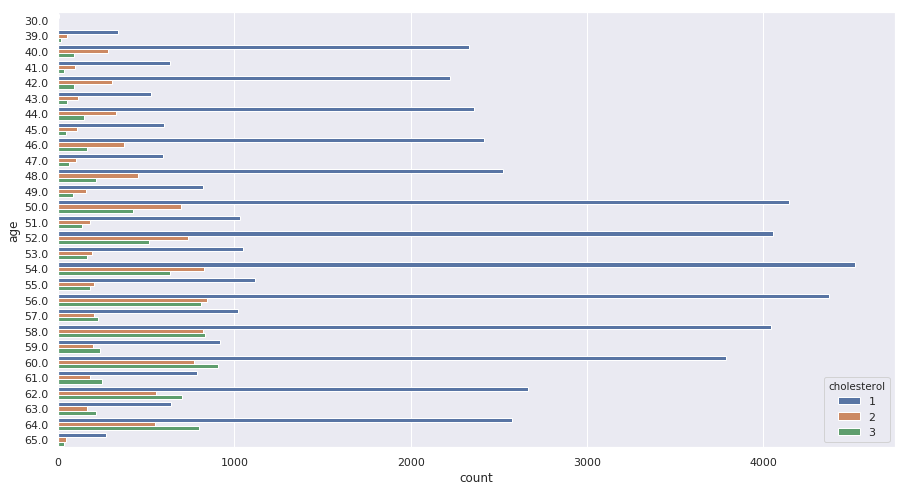

In [134]:
#8
plt.figure(figsize=(15, 8)) 
sns.countplot(y='age', hue='cholesterol', data=df);


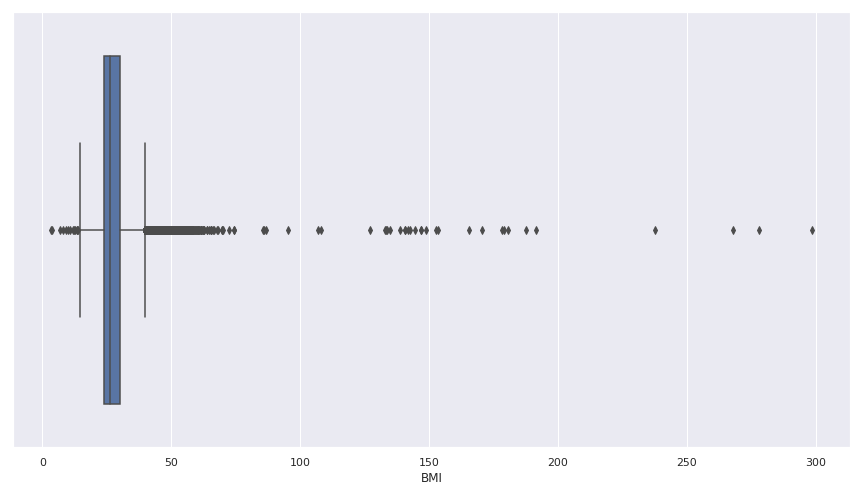

In [136]:
#9
plt.figure(figsize=(15, 8)) 
sns.boxplot(df['BMI']);

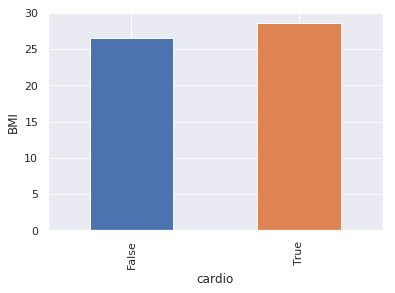

In [137]:
#10
df.groupby('cardio')['BMI'].mean().plot(kind='bar')
plt.ylabel('BMI')
plt.show();
#ССЗ повышает ИМТ

# Задания для самостоятельной работы

1. Определите количество мужчин и женщин среди испытуемых. Обратите внимание, что способ кодирования переменной gender мы не знаем. Воспользуемся медицинским фактом, а именно: мужчины в среднем выше женщин.

2. Верно ли, что мужчины более склонны к употреблению алкоголя, чем женщины?

3. Каково различие между процентами курящих мужчин и женщин?

4. Какова разница между средними значениями возраста для курящих и некурящих?

5. Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. Считается, что нормальные значения ИМТ составляют от 18.5 до 25. Выберите верные утверждения:

    (a) Средний ИМТ находится в диапазоне нормальных значений ИМТ.

    (b) ИМТ для женщин в среднем выше, чем для мужчин.

    (c) У здоровых людей в среднем более высокий ИМТ, чем у людей с ССЗ.

    (d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин

6. Удалите пациентов, у которых диастолическое давление выше систолического. Какой процент от общего количества пациентов они составляли?

7. На сайте Европейского общества кардиологов представлена шкала [SCORE](https://www.escardio.org/static_file/Escardio/Subspecialty/EACPR/Documents/score-charts.pdf). Она используется для расчёта риска смерти от сердечно-сосудистых заболеваний в ближайшие 10 лет. 

    Рассмотрим верхний правый прямоугольник, который показывает подмножество курящих мужчин в возрасте от 60 до 65 лет (значения по вертикальной оси на рисунке представляют верхнюю границу).

    Мы видим значение 9 в левом нижнем углу прямоугольника и 47 в правом верхнем углу. Это означает, что для людей этой возрастной группы с систолическим давлением менее 120 и низким уровнем холестерина риск сердечно-сосудистых заболеваний оценивается примерно в 5 раз ниже, чем для людей с давлением в интервале [160, 180] и высоким уровнем холестерина.

    Вычислите аналогичное соотношение для наших данных.

8. Визуализируйте распределение уровня холестерина для различных возрастных категорий.

9. Как распределена переменная BMI? Есть ли выбросы 

10. Как соотносятся ИМТ и наличие ССЗ? Придумайте подходящую визуализацию.
